## Suburban Living in Bulacan: Manilenos’ guide in exploring Alternative Living Outside Metro Manila

#### INSTALLING AND IMPORTING IMPORTANT ITEMS

In [160]:
!pip install geopy
from geopy.geocoders import Nominatim
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes

!pip install folium
#!pip install -c conda-forge folium=0.5.0--yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from sklearn import preprocessing
print('Libraries imported.')

Solving environment: | ^C
failed

CondaError: KeyboardInterrupt

Libraries imported.


#### IMPORTING DATA FROM THE INTERNET: Towns and Cities of Bulacan with Postal Code

In [320]:
import pandas as pd

url = 'https://sites.google.com/site/departmentofphilippines/philippine-zip-codes/provincial-zip-codes/bulacan-zip-code'
df = pd.read_html(url)

df = pd.DataFrame(df[1])
df.head()

,0,1,2,3
0,Location ZIP Code Phone Area Code Angat 3012 ...,NaN,NaN,NaN
1,Location,ZIP Code,ZIP Code,Phone Area Code
2,Angat,3012,3012,44
3,Balagtas,3016,3016,44
4,Baliuag,3006,3006,44


In [321]:
df = df.drop(df.index[[0,1,2,27]])
df.columns = ['Town','PostalCode','Zip','AreaCode']
df.head()

,Town,PostalCode,Zip,AreaCode
3,Balagtas,3016,3016,44
4,Baliuag,3006,3006,44
5,Bocaue,3018,3018,44
6,Bulacan,3017,3017,44
7,Bustos,3007,3007,44


In [323]:
df= df[['Town','PostalCode']]
df.head()

,Town,PostalCode
3,Balagtas,3016
4,Baliuag,3006
5,Bocaue,3018
6,Bulacan,3017
7,Bustos,3007


In [324]:
df['Town'] = df['Town'].str.replace('Maycauayan', 'Meycauayan')
df.head()

,Town,PostalCode
3,Balagtas,3016
4,Baliuag,3006
5,Bocaue,3018
6,Bulacan,3017
7,Bustos,3007


In [325]:
df['Province'] = df['Town'].astype(str) + ', Bulacan'
df.head()

,Town,PostalCode,Province
3,Balagtas,3016,"Balagtas, Bulacan"
4,Baliuag,3006,"Baliuag, Bulacan"
5,Bocaue,3018,"Bocaue, Bulacan"
6,Bulacan,3017,"Bulacan, Bulacan"
7,Bustos,3007,"Bustos, Bulacan"


#### EXTRACTING COORDINATES USING GEOCODER

In [195]:
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent='myGeocoder')

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df['location'] = df['Province'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

df.head()
df

,Town,PostalCode,Province,location,point,latitude,longitude,altitude
3,Balagtas,3016,"Balagtas, Bulacan","(Balagtas, Bulacan, Central Luzon, 3016, Phili...","(14.8177664, 120.9083864, 0.0)",14.817766,120.908386,0.0
4,Baliuag,3006,"Baliuag, Bulacan","(Baliuag, Bulacan, Central Luzon, 3006, Philip...","(14.9585037, 120.8970405, 0.0)",14.958504,120.897041,0.0
5,Bocaue,3018,"Bocaue, Bulacan","(Bocaue, Bulacan, Central Luzon, 3018, Philipp...","(14.7996399, 120.9264574, 0.0)",14.799640,120.926457,0.0
6,Bulacan,3017,"Bulacan, Bulacan","(Bulacan, Occidental Mindoro, Mimaropa, Philip...","(13.66468445, 120.35012872931834, 0.0)",13.664684,120.350129,0.0
7,Bustos,3007,"Bustos, Bulacan","(Bustos, Bulacan, Central Luzon, 3007, Philipp...","(14.9549111, 120.9181565, 0.0)",14.954911,120.918156,0.0
8,Calumpit,3003,"Calumpit, Bulacan","(Calumpit, Bulacan, Central Luzon, 3003, Phili...","(14.9151619, 120.7636605, 0.0)",14.915162,120.763661,0.0
9,Dona Remedios Trinidad,3009,"Dona Remedios Trinidad, Bulacan","(Doña Remedios Trinidad, Bulacan, Central Luzo...","(14.9706036, 121.0647854, 0.0)",14.970604,121.064785,0.0
10,Guiguinto,3015,"Guiguinto, Bulacan","(Guiguinto, Bulacan, Central Luzon, 3015, Phil...","(14.8289491, 120.8792922, 0.0)",14.828949,120.879292,0.0
11,Hagonoy,3002,"Hagonoy, Bulacan","(Hagonoy, Malolos, Bulacan, Central Luzon, 300...","(14.8355035, 120.7335206, 0.0)",14.835503,120.733521,0.0
12,Malolos,3000,"Malolos, Bulacan","(Malolos, Bulacan, Central Luzon, 3000, Philip...","(14.843759, 120.8113694, 0.0)",14.843759,120.811369,0.0


#### QUERYING VENUES WITHIN EACH TOWN OF BULACAN USING FOURSQUARE API

In [199]:
CLIENT_ID = 'V1AFRP0ZUOXZ34A4WENQD3QW00IA43X44EBSLICQ2A5QQTXC'
CLIENT_SECRET = 'ZFVNYLBFWS5GEPG1WRHIH2KYOKIZXLYOIE5J11DXG2C04WF3'
VERSION = '20200726'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: V1AFRP0ZUOXZ34A4WENQD3QW00IA43X44EBSLICQ2A5QQTXC
CLIENT_SECRET:ZFVNYLBFWS5GEPG1WRHIH2KYOKIZXLYOIE5J11DXG2C04WF3


In [203]:
LIMIT=200

def getNearbyVenues(names, latitudes, longitudes, radius=5000):   
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Town', 
                  'Town Latitude', 
                  'Town Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [204]:
Bulacan_venues = getNearbyVenues(names=df['Town'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude'])

Balagtas
Baliuag
Bocaue
Bulacan
Bustos
Calumpit
Dona Remedios Trinidad
Guiguinto
Hagonoy
Malolos
Marilao
Meycauayan
Norzagaray
Obando
Pandi
Paombong
Plaridel
Pulilan
San Ildefonso
San Jose del Monte
San Miguel
San Rafael
Santa Maria
Sapang Palay


In [205]:
print(Bulacan_venues.shape)
Bulacan_venues.head()

(1140, 7)


,Town,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Balagtas,14.817766,120.908386,Dairy Queen,14.830870,120.908446,Ice Cream Shop
1,Balagtas,14.817766,120.908386,Starbucks,14.830910,120.908854,Coffee Shop
2,Balagtas,14.817766,120.908386,Zapro Bistro,14.826358,120.897623,Bar
3,Balagtas,14.817766,120.908386,Starbucks,14.821640,120.923473,Coffee Shop
4,Balagtas,14.817766,120.908386,NORY's Panciteria,14.794267,120.925367,Snack Place


#### DESCRIPTIVE VISUALIZATION - Venues per Town

In [244]:
df = Bulacan_venues[['Town','Venue']]
df.head()

,Town,Venue
0,Balagtas,Dairy Queen
1,Balagtas,Starbucks
2,Balagtas,Zapro Bistro
3,Balagtas,Starbucks
4,Balagtas,NORY's Panciteria


In [207]:
df1 = df.groupby('Town').count()
df1 =df1.sort_values(by='Venue', ascending=True)
df1 = df1['Venue'].astype(int)
df1

Town
Dona Remedios Trinidad      4
Hagonoy                     6
San Miguel                  7
Norzagaray                  8
San Ildefonso              16
Calumpit                   18
Obando                     19
San Rafael                 28
San Jose del Monte         31
Sapang Palay               31
Pandi                      33
Pulilan                    56
Santa Maria                59
Paombong                   65
Malolos                    67
Plaridel                   72
Baliuag                    72
Balagtas                   81
Bustos                     82
Guiguinto                  93
Marilao                    93
Meycauayan                 99
Bocaue                    100
Name: Venue, dtype: int64

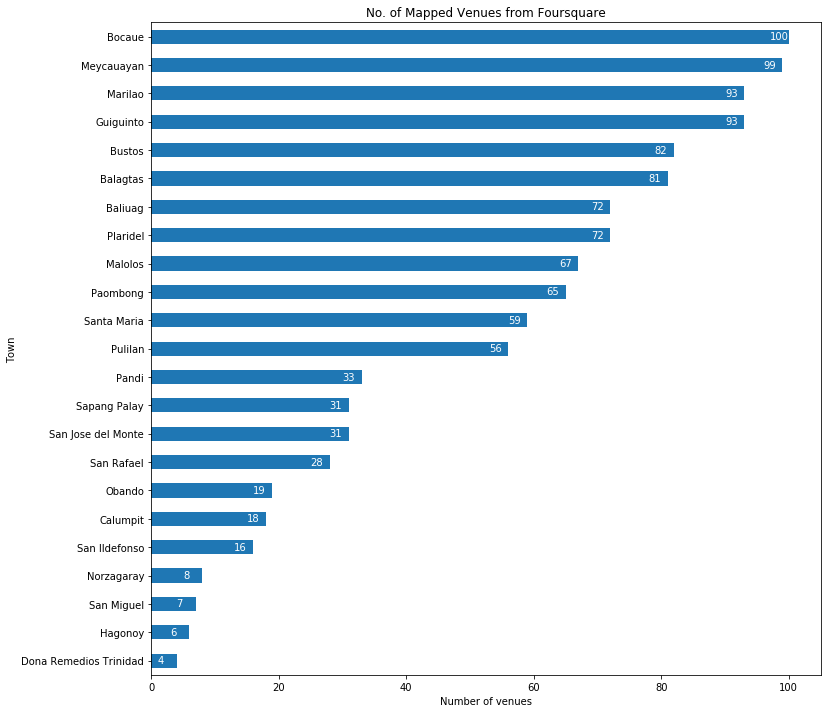

In [208]:
import matplotlib.pyplot as plt

df1.plot(kind='barh', figsize=(12, 12))

plt.xlabel('Number of venues') # add to x-label to the plot
plt.title('No. of Mapped Venues from Foursquare') # add title to the plot

# annotate value labels 
for index, value in enumerate(df1): 
    label = format(int(value)) # format int with commas
    
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 3, index - .10), color='white')
    
plt.show()

#### DESCRIPTIVE VISUALIZATION - Top Venues per Category

In [245]:
dfcat = Bulacan_venues[['Venue Category','Venue']]
dfcat.head()

,Venue Category,Venue
0,Ice Cream Shop,Dairy Queen
1,Coffee Shop,Starbucks
2,Bar,Zapro Bistro
3,Coffee Shop,Starbucks
4,Snack Place,NORY's Panciteria


In [263]:
dfcat1 = dfcat.groupby('Venue Category').count()
dfcat1 = dfcat1.sort_values(by='Venue', ascending=True).tail(10)
dfcat1  = dfcat1['Venue'].astype(int)
dfcat1

Venue Category
Fried Chicken Joint      24
Restaurant               25
Café                     36
Donut Shop               41
Chinese Restaurant       41
Pizza Place              42
Coffee Shop              63
Filipino Restaurant      70
Convenience Store        88
Fast Food Restaurant    202
Name: Venue, dtype: int64

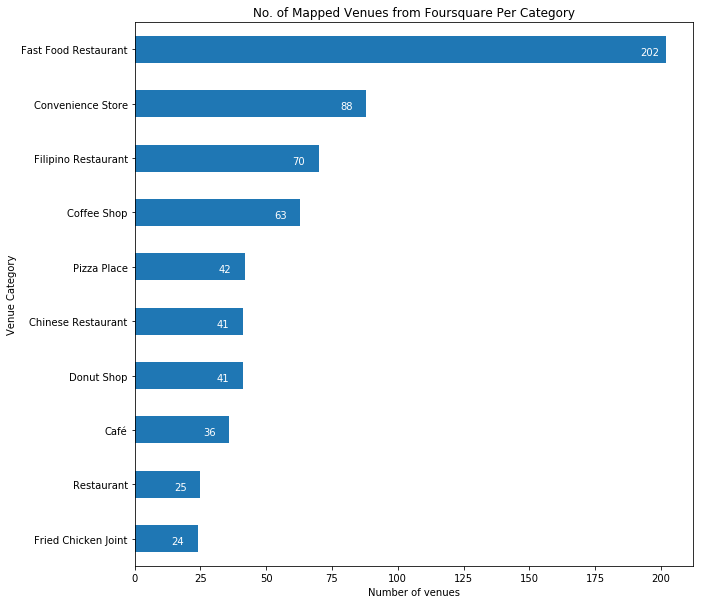

In [265]:
import matplotlib.pyplot as plt

dfcat1.plot(kind='barh', figsize=(10, 10))

plt.xlabel('Number of venues') # add to x-label to the plot
plt.title('No. of Mapped Venues from Foursquare Per Category') # add title to the plot

# annotate value labels 
for index, value in enumerate(dfcat1): 
    label = format(int(value)) # format int with commas
    
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 10, index - .10), color='white')
    
plt.show()

#### DESCRIPTIVE VISUALIZATION - Top Venue Categories per Town

In [289]:
Bulacan_venues.groupby('Town').count()
# one hot encoding
Bulacan_onehot = pd.get_dummies(Bulacan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bulacan_onehot['Town'] = Bulacan_venues['Town'] 

# move neighborhood column to the first column
fixed_columns = [Bulacan_onehot.columns[-1]] + list(Bulacan_onehot.columns[:-1])
Bulacan_onehot = Bulacan_onehot[fixed_columns]

Bulacan_onehot.head()

,Town,Airport,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,...,Snack Place,Soup Place,Spa,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Toll Plaza,Trail
0,Balagtas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Balagtas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Balagtas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Balagtas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Balagtas,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [290]:
Bulacan_grouped = Bulacan_onehot.groupby('Town').mean().reset_index()
Bulacan_grouped

,Town,Airport,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,...,Snack Place,Soup Place,Spa,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Toll Plaza,Trail
0,Balagtas,0.000000,0.000000,0.000000,0.000000,0.000000,0.012346,0.000000,0.012346,0.012346,...,0.024691,0.000000,0.012346,0.012346,0.000000,0.012346,0.000000,0.000000,0.000000,0.000000
1,Baliuag,0.000000,0.000000,0.000000,0.013889,0.000000,0.013889,0.000000,0.013889,0.000000,...,0.000000,0.027778,0.000000,0.000000,0.000000,0.027778,0.000000,0.013889,0.000000,0.000000
2,Bocaue,0.000000,0.000000,0.010000,0.000000,0.000000,0.030000,0.010000,0.020000,0.010000,...,0.020000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
3,Bustos,0.000000,0.000000,0.000000,0.012195,0.000000,0.024390,0.000000,0.012195,0.000000,...,0.000000,0.024390,0.000000,0.000000,0.000000,0.024390,0.000000,0.012195,0.000000,0.000000
4,Calumpit,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,...,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556
5,Dona Remedios Trinidad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Guiguinto,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010753,0.000000,0.000000,0.010753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Hagonoy,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Malolos,0.000000,0.014925,0.000000,0.000000,0.000000,0.029851,0.000000,0.000000,0.014925,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029851,0.000000,0.044776,0.000000,0.000000
9,Marilao,0.000000,0.010753,0.010753,0.000000,0.000000,0.021505,0.021505,0.000000,0.010753,...,0.010753,0.000000,0.021505,0.010753,0.010753,0.021505,0.010753,0.000000,0.000000,0.000000


In [328]:
Bulacan_grouped1=Bulacan_grouped.copy()

In [329]:
num_top_venues = 10

for dist in Bulacan_grouped['Town']:
    print("----"+dist+"----")
    temp = Bulacan_grouped[Bulacan_grouped['Town'] == dist].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Balagtas----
                  venue  freq
0  Fast Food Restaurant  0.25
1     Convenience Store  0.12
2            Donut Shop  0.07
3           Coffee Shop  0.07
4                 Diner  0.04
5           Pizza Place  0.04
6    Chinese Restaurant  0.04
7   Fried Chicken Joint  0.02
8           Snack Place  0.02
9   Filipino Restaurant  0.02


----Baliuag----
                  venue  freq
0  Fast Food Restaurant  0.18
1     Convenience Store  0.07
2           Pizza Place  0.04
3    Chinese Restaurant  0.04
4   Fried Chicken Joint  0.03
5            Soup Place  0.03
6   Japanese Restaurant  0.03
7   Filipino Restaurant  0.03
8           Coffee Shop  0.03
9                  Café  0.03


----Bocaue----
                  venue  freq
0  Fast Food Restaurant  0.21
1     Convenience Store  0.09
2            Donut Shop  0.08
3           Coffee Shop  0.08
4           Pizza Place  0.04
5   Filipino Restaurant  0.04
6      Asian Restaurant  0.03
7    Chinese Restaurant  0.03
8   Fried Chicken 

In [330]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [331]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Town_venues_sorted = pd.DataFrame(columns=columns)
Town_venues_sorted['Town'] = Bulacan_grouped['Town']

for ind in np.arange(Bulacan_grouped.shape[0]):
    Town_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bulacan_grouped.iloc[ind, :], num_top_venues)

Town_venues_sorted.head()

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Balagtas,Fast Food Restaurant,Convenience Store,Donut Shop,Coffee Shop,Chinese Restaurant,Pizza Place,Diner,Bakery,Japanese Restaurant,Breakfast Spot
1,Baliuag,Fast Food Restaurant,Convenience Store,Pizza Place,Chinese Restaurant,Restaurant,Bakery,Movie Theater,Café,Fried Chicken Joint,Soup Place
2,Bocaue,Fast Food Restaurant,Convenience Store,Donut Shop,Coffee Shop,Filipino Restaurant,Pizza Place,Asian Restaurant,Chinese Restaurant,Bakery,Diner
3,Bustos,Fast Food Restaurant,Convenience Store,Chinese Restaurant,Coffee Shop,Bakery,Ice Cream Shop,Café,Pizza Place,Korean Restaurant,Movie Theater
4,Calumpit,Convenience Store,Fast Food Restaurant,Resort,Trail,BBQ Joint,Department Store,Dessert Shop,Bistro,Gym,Café


#### CLUSTERING USING K-MEANS

In [332]:
Town_venues_sorted1=Town_venues_sorted.copy()

In [333]:
# set number of clusters
kclusters = 3

Bulacan_grouped_clustering = Bulacan_grouped.drop('Town', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bulacan_grouped_clustering)

kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 2, 0, 1, 0, 0], dtype=int32)

In [334]:
#add clustering labels
Town_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Bulacan_merged = df
Bulacan_merged = Bulacan_merged.join(Town_venues_sorted.set_index('Town'), on='Town')

Bulacan_merged.head()

,Town,PostalCode,Province,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Balagtas,3016,"Balagtas, Bulacan",0.0,Fast Food Restaurant,Convenience Store,Donut Shop,Coffee Shop,Chinese Restaurant,Pizza Place,Diner,Bakery,Japanese Restaurant,Breakfast Spot
4,Baliuag,3006,"Baliuag, Bulacan",0.0,Fast Food Restaurant,Convenience Store,Pizza Place,Chinese Restaurant,Restaurant,Bakery,Movie Theater,Café,Fried Chicken Joint,Soup Place
5,Bocaue,3018,"Bocaue, Bulacan",0.0,Fast Food Restaurant,Convenience Store,Donut Shop,Coffee Shop,Filipino Restaurant,Pizza Place,Asian Restaurant,Chinese Restaurant,Bakery,Diner
6,Bulacan,3017,"Bulacan, Bulacan",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bustos,3007,"Bustos, Bulacan",0.0,Fast Food Restaurant,Convenience Store,Chinese Restaurant,Coffee Shop,Bakery,Ice Cream Shop,Café,Pizza Place,Korean Restaurant,Movie Theater


In [335]:
print('Cluster 0')
Bulacan_merged.loc[Bulacan_merged['Cluster Labels'] == 0, Bulacan_merged.columns[[2] + list(range(6, Bulacan_merged.shape[1]))]]

Cluster 0


,Province,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,"Balagtas, Bulacan",Donut Shop,Coffee Shop,Chinese Restaurant,Pizza Place,Diner,Bakery,Japanese Restaurant,Breakfast Spot
4,"Baliuag, Bulacan",Pizza Place,Chinese Restaurant,Restaurant,Bakery,Movie Theater,Café,Fried Chicken Joint,Soup Place
5,"Bocaue, Bulacan",Donut Shop,Coffee Shop,Filipino Restaurant,Pizza Place,Asian Restaurant,Chinese Restaurant,Bakery,Diner
7,"Bustos, Bulacan",Chinese Restaurant,Coffee Shop,Bakery,Ice Cream Shop,Café,Pizza Place,Korean Restaurant,Movie Theater
8,"Calumpit, Bulacan",Resort,Trail,BBQ Joint,Department Store,Dessert Shop,Bistro,Gym,Café
10,"Guiguinto, Bulacan",Convenience Store,Chinese Restaurant,Filipino Restaurant,Café,Pizza Place,Donut Shop,Diner,Shopping Mall
12,"Malolos, Bulacan",Convenience Store,Pizza Place,Tea Room,Coffee Shop,Restaurant,Supermarket,Café,Asian Restaurant
13,"Marilao, Bulacan",Restaurant,Convenience Store,Donut Shop,Grocery Store,Bar,Café,Fried Chicken Joint,Filipino Restaurant
14,"Meycauayan, Bulacan",Coffee Shop,Fried Chicken Joint,Donut Shop,Chinese Restaurant,Bar,Restaurant,Grocery Store,Café
15,"Norzagaray, Bulacan",Supermarket,Filipino Restaurant,Farm,Donut Shop,Trail,Department Store,Church,Clothing Store


In [336]:
print('Cluster 1')
Bulacan_merged.loc[Bulacan_merged['Cluster Labels'] == 1, Bulacan_merged.columns[[2] + list(range(6, Bulacan_merged.shape[1]))]]

Cluster 1


,Province,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"Hagonoy, Bulacan",Filipino Restaurant,Fast Food Restaurant,Pool,Trail,Department Store,Church,Clothing Store,Coffee Shop


In [337]:
print('Cluster 2')
Bulacan_merged.loc[Bulacan_merged['Cluster Labels'] == 2, Bulacan_merged.columns[[2] + list(range(6, Bulacan_merged.shape[1]))]]

Cluster 2


,Province,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,"Dona Remedios Trinidad, Bulacan",Trail,Café,Chinese Restaurant,Church,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store
